In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart.csv')#reading csv file

In [3]:
df.info()#metadata about the csv file, also to find any missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.head(10)#by printing out first 10 data rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
df.sample(10)#random 10 data rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3,0
107,45,0,0,138,236,0,0,152,1,0.2,1,0,2,1
189,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0
57,45,1,0,115,260,0,0,185,0,0.0,2,0,2,1
263,63,0,0,108,269,0,1,169,1,1.8,1,2,2,0
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
38,65,0,2,155,269,0,1,148,0,0.8,2,0,2,1
173,58,1,2,132,224,0,0,173,0,3.2,2,2,3,0


In [6]:
df.describe()#find out count,min,max,standard_deviation,etc of specific column

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
info = ["age",
        "sex = 0: female, 1: male",
        "chestpain type = 0: typical angina, 1: atypical angina, 2: non-anginal, 3: asymptomatic",
        "resting blood pressure"," serum cholestoral in mg/dl",
        "fasting blood sugar = 0: fbs > 120 mg/dl,1: fbs < 120 mg/dl",
        "resting electrocardiographic = 0: normal,1: ST-T abnormality,2: Left Ventricular Hypertrophy",
        "maximum heart rate achieved",
        "exercise induced angina = 0: No Exercised Induced Angina, 1: Exercised Induced Angina",
        "oldpeak = ST depression induced by exercise relative to rest",
        "slope = 0: upsloping, 1: flat, 2: downsloping","number of major vessels (0-3) colored by flourosopy",
        "thal = 0: normal, 1: fixed defect, 2: reversable defect"
       ]

for i in range(len(info)):
    print(str(i)+")"+df.columns[i]+":\t\t"+info[i])

0)age:		age
1)sex:		0: female, 1: male
2)cp:		chestpain type = 0: typical angina, 1: atypical angina, 2: non-anginal, 3: asymptomatic
3)trestbps:		resting blood pressure
4)chol:		 serum cholestoral in mg/dl
5)fbs:		fasting blood sugar = 0: fbs > 120 mg/dl,1: fbs < 120 mg/dl
6)restecg:		resting electrocardiographic = 0: normal,1: ST-T abnormality,2: Left Ventricular Hypertrophy
7)thalach:		maximum heart rate achieved
8)exang:		exercise induced angina = 0: No Exercised Induced Angina, 1: Exercised Induced Angina
9)oldpeak:		oldpeak = ST depression induced by exercise relative to rest
10)slope:		slope = 0: upsloping, 1: flat, 2: downsloping
11)ca:		number of major vessels (0-3) colored by flourosopy
12)thal:		thal = 0: normal, 1: fixed defect, 2: reversable defect


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
df['target'].describe()# from above we can classify values from dataset as 0 and 1.

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [10]:
print(df.corr()['target'].abs().sort_values(ascending=False))#fbs is weakly co-related to target

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


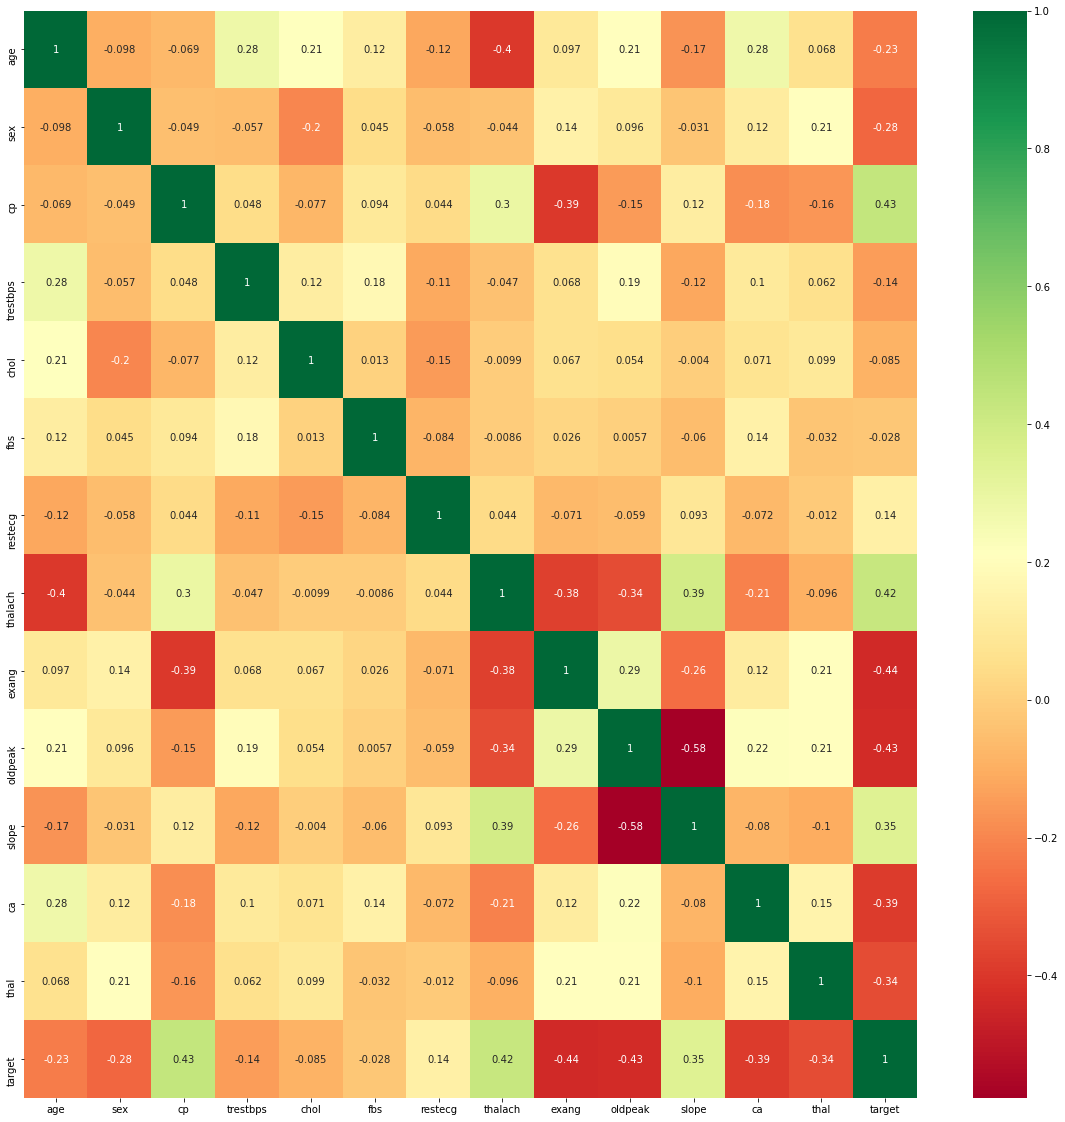

In [11]:
#FEATURE SELCTION
corrmat = df.corr()# get correlation
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
res = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

1    165
0    138
Name: target, dtype: int64


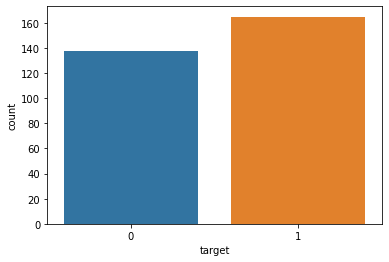

In [12]:
y = df['target']
sns.countplot(y)
temp = df.target.value_counts()
print(temp)

In [13]:
print("Percentage of patient without heart problems: "+str(round(temp[0]*100/303,2)))
print("Percentage of patient with heart problems: "+str(round(temp[1]*100/303,2)))
print("Number of people with No Disease:"+str(len(df[df.target == 0])))
print("Number of people with Disease:"+str(len(df[df.target == 1])))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46
Number of people with No Disease:138
Number of people with Disease:165


<AxesSubplot:xlabel='cp', ylabel='target'>

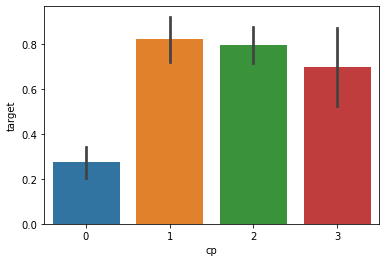

In [14]:
df['cp'].unique()#output: 0,1,2,3
sns.barplot(df['cp'],y)# we classify that people with 1:atypical angina are likley to have heart disease and vice versa...

<AxesSubplot:xlabel='restecg', ylabel='target'>

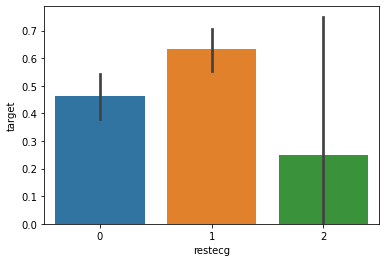

In [15]:
df['restecg'].unique()#output: 0,1,2
sns.barplot(df['restecg'],y)#we classify that people with 0:normal and 1:ST-T abnormality are likely to have heart disease 

<AxesSubplot:xlabel='sex', ylabel='target'>

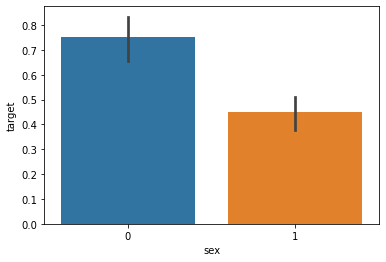

In [16]:
df['sex'].unique()#output: 0,1
sns.barplot(df['sex'],y)#we classify that  in female patient are likely to have heart disease.

<AxesSubplot:xlabel='fbs', ylabel='target'>

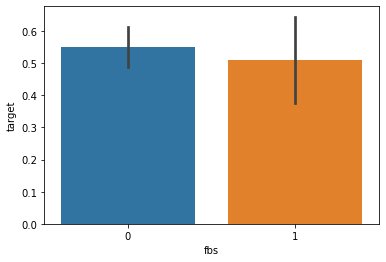

In [17]:
df['fbs'].unique()#output: 0,1 #fasting bloid sugur
sns.barplot(df['fbs'],y)#we classify that patient having more than 0:120mg is likely to have heart disease

<AxesSubplot:xlabel='exang', ylabel='target'>

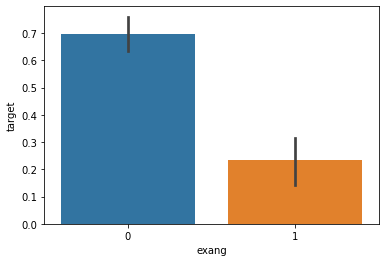

In [18]:
df['exang'].unique()#output: 0,1
sns.barplot(df['exang'],y)#we classify that patient having exang = 0 are likely to have heart disease.

<AxesSubplot:xlabel='slope', ylabel='target'>

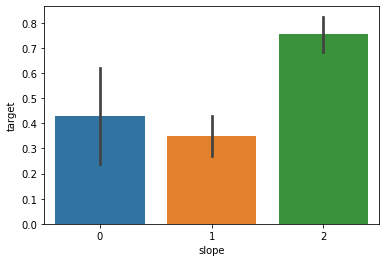

In [19]:
df['slope'].unique()#output: 0,1,2
sns.barplot(df['slope'],y)# we classify that people with slope = 2 are likely to have more pain that 0 and 1.

<AxesSubplot:xlabel='ca', ylabel='target'>

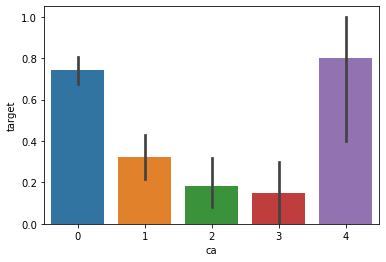

In [20]:
df['ca'].unique()#output: 0,1,2,3,4 
sns.barplot(df['ca'],y)#we classify that people with ca = 4 are having more number of heart patients.

<AxesSubplot:xlabel='thal', ylabel='target'>

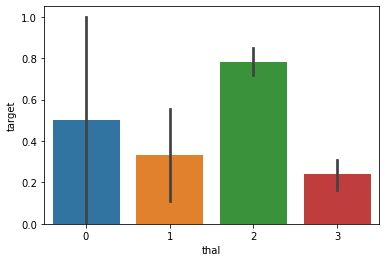

In [21]:
df['thal'].unique()# output : 0 ,1 ,2 ,3
sns.barplot(df['thal'],y)

In [22]:
from sklearn.model_selection import train_test_split

prediction = df.drop('target',axis=1)
target = df['target']

X_train,X_test,Y_train,Y_test = train_test_split(prediction,target,test_size=0.2,random_state=0)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


In [24]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train,Y_train)
Y_pred_classifier = classifier.predict(X_test)
score_classifier_logistic = round(accuracy_score(Y_pred_classifier,Y_test)*100,2)
print("The Accuracy of the Logistic Regression model is :"+str(score_classifier_logistic))

The Accuracy of the Logistic Regression model is :85.25


In [25]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,Y_train)
Y_pred_classifier = classifier.predict(X_test)
score_classifier_bayes = round(accuracy_score(Y_pred_classifier,Y_test)*100,2)
print("The Accuracy of the Navie Bayes model is :"+str(score_classifier_bayes))

The Accuracy of the Navie Bayes model is :85.25


In [26]:
from sklearn import svm
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train,Y_train)
Y_pred_classifier = classifier.predict(X_test)
score_classifier_svm = round(accuracy_score(Y_pred_classifier,Y_test)*100,2)
print("The Accuracy of the Navie Bayes model is :"+str(score_classifier_svm))

The Accuracy of the Navie Bayes model is :81.97


In [27]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=16)
classifier.fit(X_train,Y_train)
Y_pred_classifier = classifier.predict(X_test)
score_classifier_knn = round(accuracy_score(Y_pred_classifier,Y_test)*100,2)
print("The Accuracy of the Navie Bayes model is :"+str(score_classifier_knn))

The Accuracy of the Navie Bayes model is :67.21


In [28]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    classifier = DecisionTreeClassifier(random_state=x)
    classifier.fit(X_train,Y_train)
    Y_pred_classifier = classifier.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_classifier,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


classifier = DecisionTreeClassifier(random_state=best_x)
classifier.fit(X_train,Y_train)
Y_pred_classifier = classifier.predict(X_test)
score_classifier_tree = round(accuracy_score(Y_pred_classifier,Y_test)*100,2)
print("The Accuracy of the Decision Tree Classifier model is :"+str(score_classifier_tree))

The Accuracy of the Decision Tree Classifier model is :81.97


In [29]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0

for x in range(200):
    classifier = RandomForestClassifier(random_state=x)
    classifier.fit(X_train,Y_train)
    Y_pred_classifier = classifier.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_classifier,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


classifier = RandomForestClassifier(random_state=best_x)
classifier.fit(X_train,Y_train)
Y_pred_classifier = classifier.predict(X_test)
score_classifier_forest = round(accuracy_score(Y_pred_classifier,Y_test)*100,2)
print("The Accuracy of the Random Forest Classifier model is :"+str(score_classifier_forest))

The Accuracy of the Random Forest Classifier model is :88.52


In [30]:
scores = [score_classifier_logistic,score_classifier_bayes,score_classifier_svm,score_classifier_knn,score_classifier_tree,score_classifier_forest]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 88.52 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

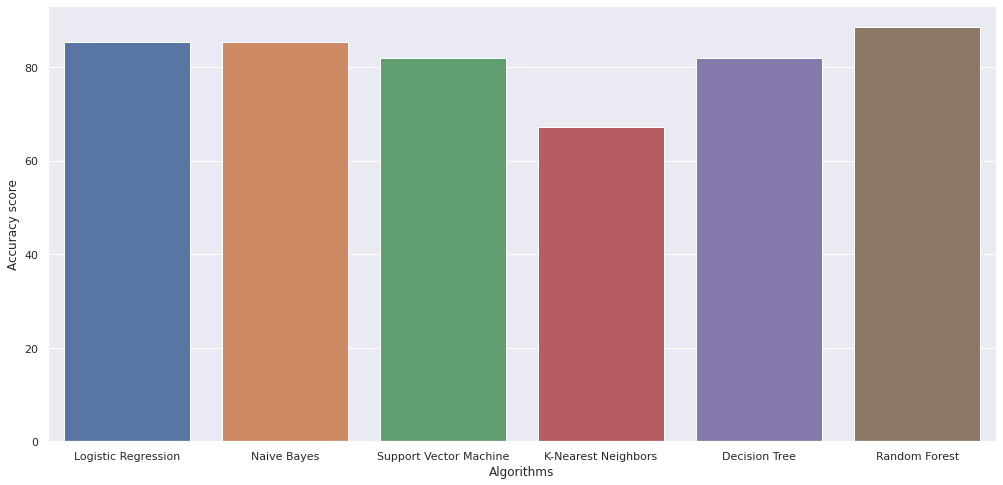

In [31]:
sns.set(rc={'figure.figsize':(17,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)